Method 1:

{1: array([2798390.5], dtype=float32), 2: array([2147606.5], dtype=float32), 3: array([1688014.9], dtype=float32), 4: array([2192210.5], dtype=float32), 5: array([1472954.9], dtype=float32), 6: array([1269451.5], dtype=float32), 7: array([3196221.2], dtype=float32), 10: array([1552052.5], dtype=float32), 11: array([816252.94], dtype=float32), 12: array([829850.2], dtype=float32), 13: array([2659830.], dtype=float32), 14: array([697160.06], dtype=float32)}


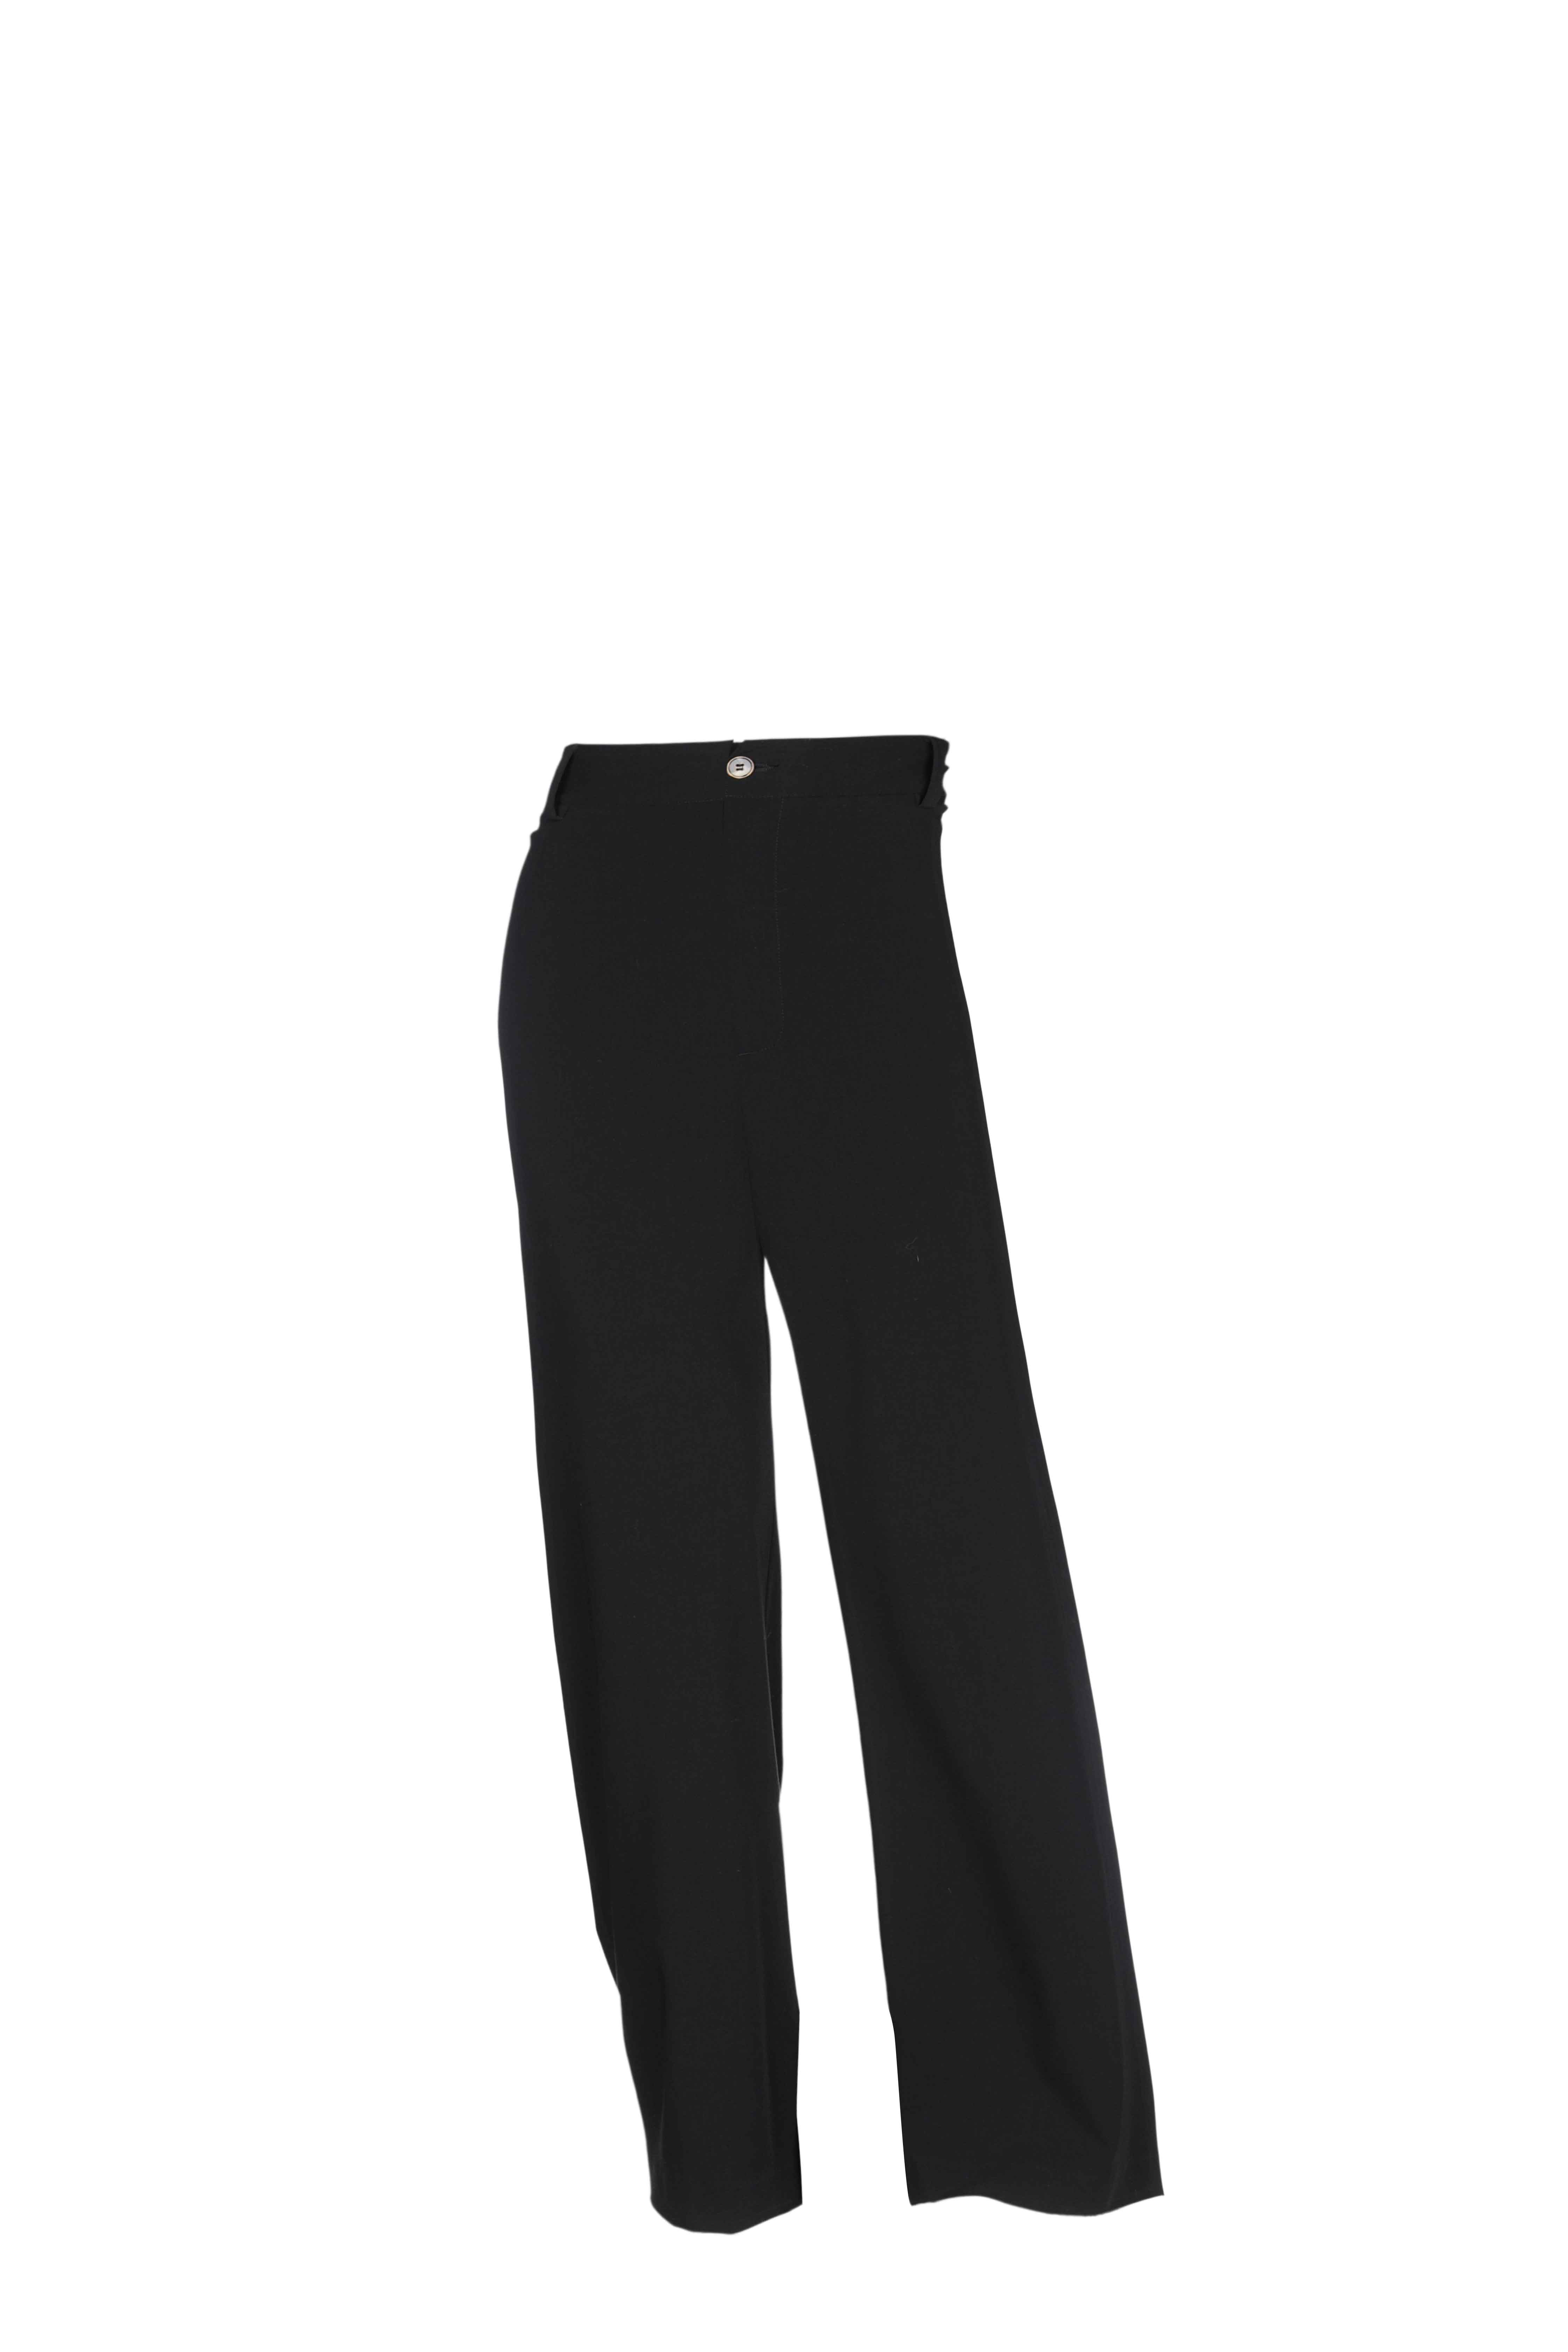

7


In [17]:
import cv2
from google.colab.patches import cv2_imshow

def calc_eud_dist(hist_query_img,hist_db_img):
  c =0   
  # Euclidean Distace between data1 and test
  i = 0
  while i<len(hist_query_img) and i<len(hist_db_img):
      c+=(hist_query_img[i]-hist_db_img[i])**2
      i+= 1
  return c**(1 / 2)

path = '/content/drive/MyDrive/simTest-20210717T053757Z-001/simTest/'
# test image
image = cv2.imread(path+'querry.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
histogram = cv2.calcHist([gray_image], [0], 
                         None, [256], [0, 256])

elu_dist = dict()   
for i in [1,2,3,4,5,6,7,10,11,12,13,14]:
  image = cv2.imread(path+'dataBase/{}.jpg'.format(i))
  gray_image1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  histogram1 = cv2.calcHist([gray_image1], [0], 
                          None, [256], [0, 256])
  elu_dist[i] = calc_eud_dist(histogram, histogram1)
print(elu_dist)
key = max(elu_dist, key=elu_dist.get)
img = cv2.imread(path+'dataBase/{}.jpg'.format(key))
cv2_imshow(img)
print(key)


Method 2:

In [15]:
from PIL import Image
import imagehash

path = '/content/drive/MyDrive/simTest-20210717T053757Z-001/simTest/'

test = imagehash.average_hash(Image.open(path+'querry.jpg'))
similar = dict()
for i in [1,2,3,4,5,6,7,10,11,12,13,14]:
  db = imagehash.average_hash(Image.open(path+'dataBase/{}.jpg'.format(i)))
  similar[i] = test - db  
key = max(similar,key=similar.get)
print(key)

1


In [7]:
!pip install imagehash

     |████████████████████████████████| 819kB 4.9MB/s 
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=666edfae8402d9003a3c433c993a03b0b2a9b16ca8c2ec8aa36210202cff03f5
  Stored in directory: /root/.cache/pip/wheels/32/3c/c7/b0653122fc94b27b4c60d2260896bb4759e56396c6720d0a6c
Successfully built imagehash
